In [84]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

# Loading the data
df = pd.read_csv('C:\\Users\\Saiful_desv\\Desktop\\Segmentation in Python\\segmentation_draft.csv')


# We could also get overall info for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 5 columns):
market               5357 non-null object
producer             5357 non-null object
totalcomb            5357 non-null int64
newrfpdtq            5357 non-null int64
combnewrenrfpsold    5357 non-null int64
dtypes: int64(3), object(2)
memory usage: 209.3+ KB


In [3]:
# Let's see a preview of the data
df.head()


,market,producer,totalcomb,newrfpdtq,combnewrenrfpsold
0,Arizona,Ariz1,1,0,1
1,Arizona,Ariz2,2,2,0
2,Arizona,Ariz3,6,4,0
3,Arizona,Ariz4,1,0,0
4,Arizona,Ariz5,1,0,0


In [63]:
# Summary of all variables
df.describe(include='all')

,market,producer,totalcomb,newrfpdtq,combnewrenrfpsold
count,5357,5357,5357.000000,5357.000000,5357.000000
unique,19,5357,NaN,NaN,NaN
top,NY/NJ,MidA87,NaN,NaN,NaN
freq,590,1,NaN,NaN,NaN
mean,NaN,NaN,9.570655,3.751353,2.161284
std,NaN,NaN,26.475525,10.938084,6.940947
min,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,0.000000,0.000000
50%,NaN,NaN,2.000000,1.000000,0.000000
75%,NaN,NaN,6.000000,2.000000,1.000000


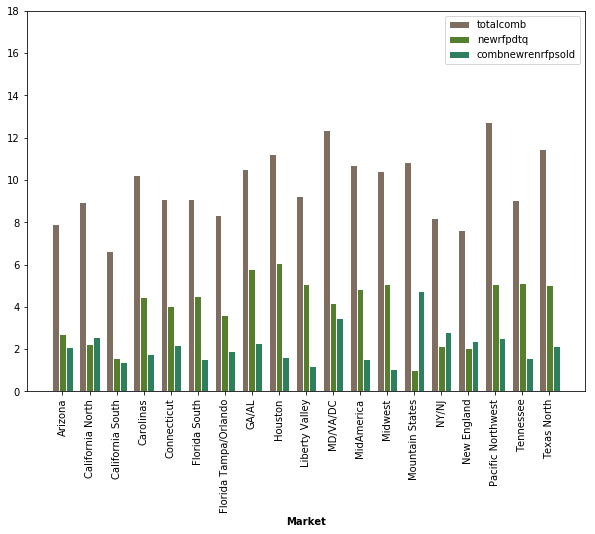

In [71]:
# Libraries to for visualization
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = df.groupby('market')['totalcomb'].mean()
bars2 = df.groupby('market')['newrfpdtq'].mean()
bars3 = df.groupby('market')['combnewrenrfpsold'].mean()

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

keys = bars1.keys()

# Make the plot
plt.figure(figsize=(10, 7))

p1 = plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='totalcomb')
p2 = plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='newrfpdtq')
p3 = plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='combnewrenrfpsold')
 
# Add xticks on the middle of the group bars
plt.ylim([0,18])
plt.xlabel('Market', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],keys,rotation=90)
plt.legend()

# Create legend & Show graphic
plt.legend()
plt.show()


In [87]:
from sklearn.preprocessing import StandardScaler
df[['totalcomb', 'newrfpdtq','combnewrenrfpsold']] = StandardScaler().fit_transform(df[['totalcomb', 'newrfpdtq','combnewrenrfpsold']])
df.head()

,market,producer,totalcomb,newrfpdtq,combnewrenrfpsold
0,Arizona,Ariz1,-0.323750,-0.342995,-0.167325
1,Arizona,Ariz2,-0.285976,-0.160130,-0.311411
2,Arizona,Ariz3,-0.134879,0.022734,-0.311411
3,Arizona,Ariz4,-0.323750,-0.342995,-0.311411
4,Arizona,Ariz5,-0.323750,-0.342995,-0.311411


In [88]:
# Hiarchical Clustering
data = df.iloc[:, 3:5].values 
data



array([[-0.34299459, -0.16732482],
       [-0.16013014, -0.31141083],
       [ 0.02273432, -0.31141083],
       ...,
       [-0.25156237, -0.31141083],
       [-0.34299459, -0.31141083],
       [-0.34299459, -0.31141083]])

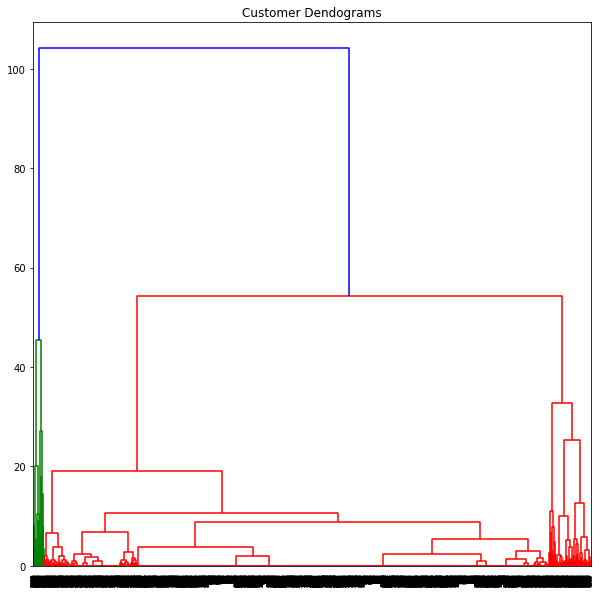

In [89]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,10))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

In [90]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

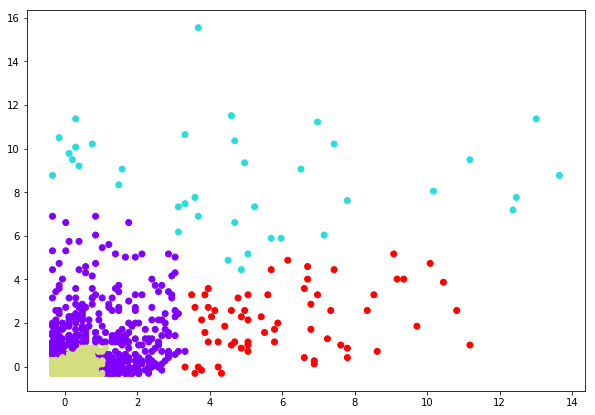

In [91]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow') 

In [ ]:
#